# **Trip Advisor Hotel Reviews Sentiment Analysis**



In [23]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Obtain Data**

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/Mund99/DSUB_5.0/main/Dataset/tripadvisor_hotel_reviews.csv')

pd.set_option('display.max_colwidth', 100)
df.head(10) #Return the first 10 rows

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took adv...",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, sta...",2
2,nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathro...,3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown s...",5
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room ...",5
5,love monaco staff husband stayed hotel crazy weekend attending memorial service best friend husb...,5
6,"cozy stay rainy city, husband spent 7 nights monaco early january 2008. business trip chance com...",5
7,"excellent staff, housekeeping quality hotel chocked staff make feel home, experienced exceptiona...",4
8,"hotel stayed hotel monaco cruise, rooms generous decorated uniquely, hotel remodeled pacific bel...",5
9,"excellent stayed hotel monaco past w/e delight, reception staff friendly professional room smart...",5


# **Scrub Data**

In [25]:
# Print the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [26]:
# Check null values 
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon');

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
# Functions
# 1. Create sentiment compound score
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

# 2. The sentiment of the review
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

In [29]:
# Apply Sentiment Compound Score
sentiment_score = df["Review"].astype("str").apply(compound_score)
df["Sentiment_Score"] = sentiment_score

# Apply Sentiment
df["Sentiment"] = df["Sentiment_Score"].apply(sentiment)

# Check dataframe
df.head()

,Review,Rating,Sentiment_Score,Sentiment
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took adv...",4,0.9747,Positive
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, sta...",2,0.9787,Positive
2,nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathro...,3,0.9889,Positive
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown s...",5,0.9912,Positive
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room ...",5,0.9797,Positive


# **Explore Data**

### General Distribution of Rating

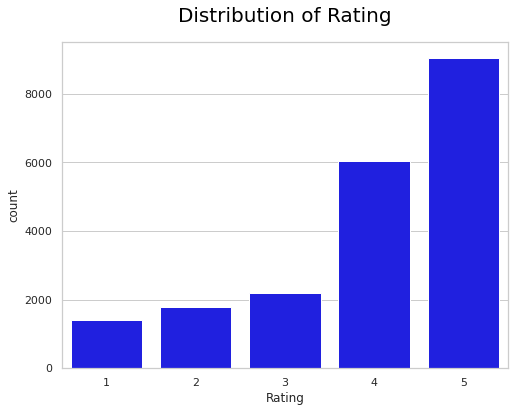

In [30]:
# Visualise rating distribution 
sns.countplot(data=df, x='Rating', color='blue')

sns.set(rc={'figure.figsize':(8,6)}, style='whitegrid')
plt.title(label = "Distribution of Rating", fontsize = 20, color = "Black", pad = '20');

From the chart, the hotel is doing good with high number of positive rating (4 and 5). 

## **Word Cloud**

In [31]:
from wordcloud import WordCloud

def wordcloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # plot the WordCloud image                        
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontsize = 20, color = "Black", pad = '20')
    plt.show() 

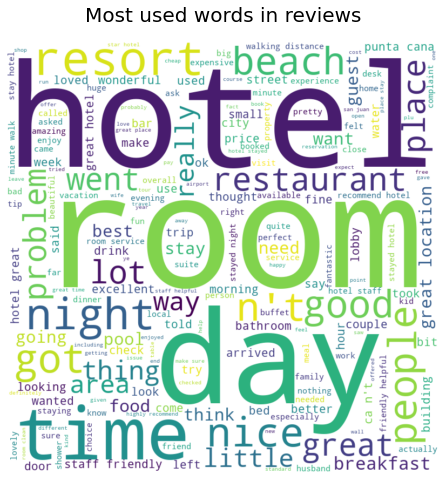

In [32]:
# Display the most used words among all the reviews 
wordcloud_generator(df['Review'], title="Most used words in reviews")

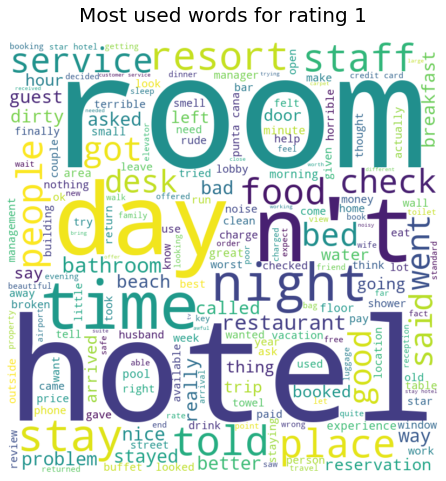

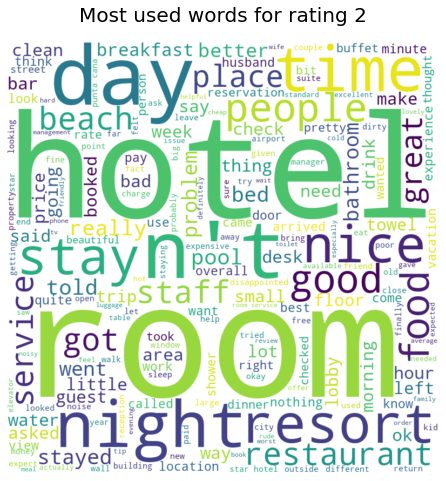

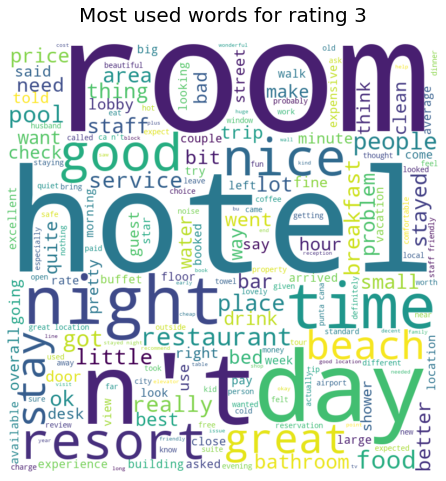

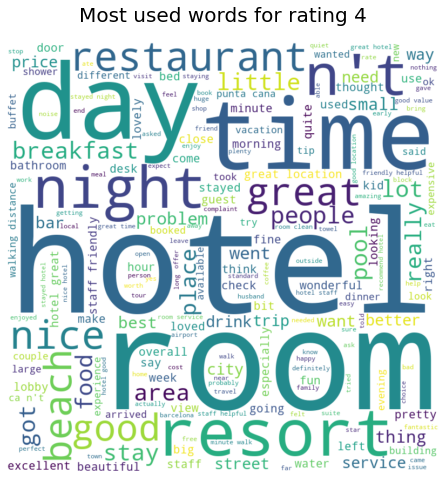

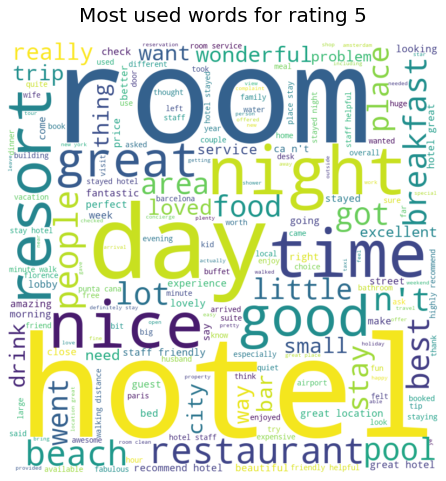

In [33]:
# Display the most used words in each rating
for rating in range(1, 6):
  reviews = df[df['Rating'] == rating]
  wordcloud_generator(reviews['Review'], title="Most used words for rating " + str(rating))

- The words - room, hotel, day, night, time appear in all rating. 
- There would be mixed comments in using these words in all the ratings. 

### **Look Into the Keyword From Word Cloud**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
feature = tfidf.fit_transform(df['Review'])

### Keyword 1: Room

In [35]:
query = 'room'
queryTFIDF = tfidf.transform([query])

cosims = cosine_similarity(queryTFIDF, feature).flatten()
results = cosims.argsort()[:-6:-1]

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print("----")

Similarity score: 0.39192, 
Review: forgot clean room stayed result great reviews, cheapest room downtown area staying suite no less.i say hotel lovely room large location ca n't beat, continental breakfast delivered room right time mornings smiling faces, fact enjoyed hotel forgot make room saturday fri sun, got room 3:30 pm afternoon shopping room not, called desk told situation said try make incoming guests rooms sense, told 5 room up.we returned 5:10 room not, called desk clerk expressed surprise room n't, told forget getting ready play room turned evening, came play dinner room prepared evening.overall stay fine great location great price room spacious, oh bathroom vanity area wonderful spacious,  
----
Similarity score: 0.32488, 
Review: sour singapore elizabeth hotel failed provide room booked, state wife happy transfers airport breakfast provided hotel rooms booked paid travel agent end 2006 did not align room given, arrived hotel directed room entered room discovered room not 

### Keyword 2: Hotel

In [36]:
query = 'hotel'
queryTFIDF = tfidf.transform([query])

cosims = cosine_similarity(queryTFIDF, feature).flatten()
results = cosims.argsort()[:-6:-1]

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print("----")

Similarity score: 0.36168, 
Review: great hotel, stayed london bridge hotel 3 nights great way begin trip england, hotel small botique hotel nicely, hotel staff helpful took care details, definately stay hotel,  
----
Similarity score: 0.34979, 
Review: loved lovely serenity hotel just got hotel way prague amazing hotel staff friendly courteous, arrive early flight got hotel 9 nice check service checkin 3 pm, wonderful bfast best europe hotel clean quiet shuttle time efficient, hotel great hotel transit quick trip frankfurt easy access downtown.i really love hotel happy heart beat.dont hesitate 49 countries hotel best transit stopover hotel city hotel, way courtyard messe,  
----
Similarity score: 0.33757, 
Review: nice stay amsterdam overall hotel toren nice experience, location wonderful staff extremely nice helpful, hotel small rooms bit musty age, room noisy hear guests hotel, hotel kept clean, recommend hotel running good deal feel paid little hotel,  
----
Similarity score: 0.335

### Keyword 3: Day

In [37]:
query = 'day'
queryTFIDF = tfidf.transform([query])

cosims = cosine_similarity(queryTFIDF, feature).flatten()
results = cosims.argsort()[:-6:-1]

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print("----")

Similarity score: 0.34971, 
Review: nice great beach best seen punta cana, food day worst cockroaches room day,  
----
Similarity score: 0.26669, 
Review: nice hotel 4-star 5-star got nice offer hotel ba holidays website.otherwise n't spent 500 night hotel let speak view, everybody amazing true easily upgrade harbour view room spending 100 night able nice room price city view room, did n't view extraordinary, maybe nyc grey water statue liberty far away nice telescope room, second fact hotel n't tall 14 stories quite impossible breathtaking view personally enjoy lot high floor room clean big bed wonderful, look room n't feel like 5-star hotel, furnishings average.bathroom really nice wc bathtub shower apart, nice bulgari amenitites also.there thing quite strange quality housekeeping changed day, day free bottles water day n't day chocolates bed day day new bottles conditioner shampoo lotion day deal old ones location good bad time want quiet sterile area probably best hotel nyc, want n

### Keyword 4: Night

In [38]:
query = 'night'
queryTFIDF = tfidf.transform([query])

cosims = cosine_similarity(queryTFIDF, feature).flatten()
results = cosims.argsort()[:-6:-1]

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print("----")

Similarity score: 0.36496, 
Review: great hotel stayed night thoroughly agreeable, room modern spacious room service tasty bathroom big hotel clean friendly staff, night night city break hotel ideal,  
----
Similarity score: 0.31526, 
Review: great hotel centrally located just came 3 night stay great time room clean hotel close major attraction just blocks ramblas quiet night althought street little deserted night problems,  
----
Similarity score: 0.26984, 
Review: n't extremely tiny rooms dirty expensive dirty toilet blanket sheet used, unknown stains, asked change clean got answer change morning, guy reception desk smoking night long smoke got straight room, room liks solitary confinement, paid 140 euro night, left night stayd night nh doelen 4 stars hotel, 94 euro night nights nh tropen 3 stars hotel 56 euro night excellent hotles,  
----
Similarity score: 0.25815, 
Review: noisy night small hotel right heart florence, rooms clean good size breakfast adequate location quite noisy n

### Keyword 5: Time

In [39]:
query = 'time'
queryTFIDF = tfidf.transform([query])

cosims = cosine_similarity(queryTFIDF, feature).flatten()
results = cosims.argsort()[:-6:-1]

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print("----")

Similarity score: 0.36869, 
Review: greaat time time time dominican republic, traveled couple great time, traveled islands countries, not say picky like finer things life, golfers hotel advertised ai golf able play daily hotel shuttle ran time golf course cocotal lovely, pay 35.00 pp cart knew, tee time 7:00 took 11:00am shuttle resort, ordered room service breakfast 3 days order correct time daily.the property clean room clean, did not like seaweed beach cleaned daily beach area, undersand seaweed time, used watersports paddleboats took catamaran sailing lesson, book day prior busy no problem getting wanted, spa okay compared world class spa areas not tops, book ahead time appointment time no complanits, ate reasturants passion favorite market grille favorite.the main trouble language barrier, speak dangerous, staff speak little no english, ask frustrating, property use customer training language assistance best time anytime,  
----
Similarity score: 0.35378, 
Review: 2nd time allways

## **Analyze Sentiment Intensity**

In [40]:
df.Sentiment.value_counts()

Positive    18263
Negative     1162
Neutral      1066
Name: Sentiment, dtype: int64

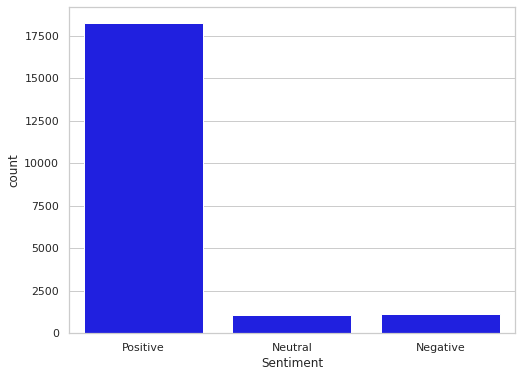

In [41]:
# Visualize the overall sentiment distribution
sns.set(rc={'figure.figsize':(8,6)}, style='whitegrid')
sns.countplot(data=df, x="Sentiment", color="blue");

In [42]:
# Visualize the sentiment distribution in each ratings
Viz_1 = df[['Rating','Sentiment']].value_counts().rename_axis(['Rating','Sentiment']).reset_index(name='counts')

# Plot the graph 
fig = px.bar(x=Viz_1.Rating, y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'},width=1000, height=600)
fig.show()

### Review with High Rating But Negative Sentiment

In [43]:
pd.set_option('display.max_colwidth', None)
df[(df['Rating'] == 5) & (df['Sentiment_Score'] < 0)].sort_values("Sentiment_Score")[0:20]

,Review,Rating,Sentiment_Score,Sentiment
3613,"fabulous, booking vacation 4 dismay realized punta cana not mexico, frantically searched information possibly iberostar punta cana, tripadvisor helpful reading personal reviews experiences nervous wreck, apprehension arrived 12/5/03, arrival airport flights arriving time orderly fashion went quickly, check went wanted king sized beds none available till day, no problem, grounds absolutely beautifull maintained, entire resort practically spotless, people work hard cleaning areas resort, met unfriendly worker, bent backward accomodate reason course, food aplenty satisfy tastebuds, types activity spanish lessons dancing arobics, did nothing relax eat drink dance alittle night, no group got sick brushed teeth spigot water, believe moderation probably key, rooms clean no trouble whatsoever housekeeping, wonder people wrote negative remarks place stayed sameplace did, thing upset trip did not book weeks, heart beat,",5,-0.9677,Negative
7143,"wonderful 10 year anniversay went secrets feb. 28- mar, 6 2004. read million reviews quite nervous going having bad experience, not happened, beautiful experience, resort beautiful people friendly accommidating, thing wrong, negative review true slowness service restaurants, did bring bug spray use not night walked beach, complaint resort little pet peeve n't cappucino 10:00, like alot earlier really no big deal, resort heart beat try new place, worrying good place, absolutely, email question,",5,-0.9272,Negative
13296,"hell argonaut changed planned birthday getaway city husband, stuck work til late night, packed grabbed sleepy kids drove argonaut, husband not eaten breakfast things not going, cranky kids irrate husband prayed hotel nice, tripadvisor took chance, soon dinner 10pm stood line 2 couples germans needed explained, thought worst going, time turn receptionist bit annoyed ordeal, requested room gave key, turned mentioned husband birthday bad start, suggested room 2 queens not satisfactory best comfortable, went room definitely quiet inner court nothing write home, went downstairs asked choices, suggested ocean view king size bed separate pull sofa children, jacuzzi tub, offered room deep discount took, receptionist n't warm fuzzy type person encountered gets a+ trying knowing condition.it luxurious comforter 2 bedroom suite-pocket doors table minibar huge space thousand square feet overlooking alcatraz ocean leopard robes huge jacuzzi tub family fit, 2 kids, husband able sleep luxurious bath, kids plenty running room.i sad leave know time, request upgrade king suite night, btw park beach parking garage, cheaper,",5,-0.9252,Negative
12767,"dumbstruck nothing kudos place check check room staff nothing short excellent, view room overlooking trade center river incredible, weekend kind quiet want, skip restaurant recommendations church day rate..you wo n't dissapointed, traveller spends 80 nights year hotels, place star rating, not solid, loved having starbucksa door complaint lack coffee maker room, thats complaint,",5,-0.9060,Negative
3199,"disgusted comments just wanted make comments, notice bad reviews come cities north-east usa, makes sick listen prejudice comments, n't realize iknow n't foreigner going country need learn language, dont criticise country does n't know speak english, wake people different attitude explore different cultures, ca n't stay home visit english speaking country,",5,-0.9021,Negative
1317,"oasis preface saying really hate waikiki, crowds, noise, over-commercialization, asked fly speak conference excited visit islands mean c'mon kind dreading waikiki, wow, royal hawaiian saved, older historic section, read reviews people did n't like, granted legitimately bad experience, think likely accustomed box-like rooms standard here.my room quiet, outside garden birds singing, staff not professional courteous, 10. surrounded highrises insanity tourism gone wild place fortress solitude, come, heartbeat, bring family,",5,-0.8292

### Review with Low Rating But High Sentiment

In [44]:
df[(df['Rating'] == 1) & (df['Sentiment_Score'] > 0)].sort_values("Sentiment_Score", ascending=False)[0:20]

Review  \
17082                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 large personalized service, terrible food terrible service stayed resort christmas holidays december 21 december 28 2007 room 65109. hotel lobby nice clean check went smoothly no hitches, staff polite check, given map, no schedule activities no information booking reservations restaurants, extra things paid package, thank god trip advisor, research.this hotel sections not packages not allowed enjoy amenities, just wander pool area comes tells leave, saw happen guests, instructions check prevent this.ok good things, property property quite nice, landscaping good not breathtaking resort kept clean, big plus given 70 buildings resort 18 rooms, did napkin calculation came 7,000 people resort occupancy christmas period, kept people waiting eat christmas dinner night send folks upgraded premier area just accommodate real nuisance actually paid upgrade.beach beach ocean just beautiful, ocean beautiful nice swim no shells no rocks just beautiful miles white sand, biggest plus vacation, plenty shade beach lounge chair reserve towel 8am morning, real downer vacationers, beach allowed topless lot that.rooms rooms comfortable clean, stayed ambar section upgrade, bed average no westin beds comfortable, air conditioner worked great, bathroom nice clean rain head showers, lighting terrible rooms, say rooms furnishings 3 star level.now areas needing improvement lots food 7,000 people place starts feel like campus instead resort food takes cafeteria quality, food terrible cold, cooks sloppy preparing meals e.g. omelettes, not trust salads lots water pan, food beach better warm, roast chicken burgers fries days, hot items, love pork enjoy dr. lots not bad, wished local food maybe better prepared, cooks not chefs did not clue, food important vacation rule resort, said did sent premier section christmas dinner overflow, food ok guess pay big bucks ok food not great, did visit reserved restaurants just set menu, pre-made just brought fridge table cold plate, none restaurants great french gourmet better tried.service no personalized service, sense employees not happy treated comes service, no really stretches provide good service, polite not necessarily pleasant, examples family friends tried transferred 5-15 minutes connecting room, sleeping night heard sounded like running water, ceiling leaking floor, called desk transferred 4am person spoke said not job__Ç, no came check leak, employees easily tell not job point says, sense employees not really empowered, black family traveling received discriminatory service staff e.g. skipping line taking white folks having waiters come serve table, experienced different points stay, apparently history dark skinned black people dr. 20 black people resort 7000 people strange, did not let spoil holiday not there.getting resort shuttle n't want walk 5-10 minute walk resort especially beach main dining areas, great thing hang getting resort does not huge anymore.nightly shows entertainment staged shows resorts average, tried french cabaret western shows e.g. lion king- course oddly interpreted, like making dinner bunch chefs guests europeans americans, mini-circus night good, better showing latin culture rich vibrant fun, nightly live band does mix imitating western ballads poorly singers reading words performing set staff organize daytime events volleyball dance sing live band dance guests nightclub,